**Predictive Analytics for Patient Health Risk Assessment Using Synthetic Clinical Data**

**Aim of the Study**

The aim of this study is to analyze a synthetic patient-health dataset to identify key clinical patterns, explore the relationships among various health indicators, and assess the risk factors associated with eye diseases—specifically diabetic retinopathy. By applying data analytics and visualization techniques, the study seeks to uncover meaningful insights that can support early detection, improve risk assessment, and contribute toward data-driven decision-making in healthcare. Ultimately, the study demonstrates how structured patient data can be leveraged to model and understand health outcomes in a controlled, synthetic environment.

**Problem Definition**

Healthcare systems generate vast amounts of patient information, but transforming this data into actionable insights remains a challenge. Clinicians often rely on manual assessment, which can be time-consuming, prone to human error, and limited by the complexity of multi-factor health conditions.

The dataset (patient_data.csv), containing 20,000 patient records with 10 variables, provides an opportunity to explore how machine-learning and statistical analysis can help in:

Identifying relationships between health metrics such as age, blood pressure, glucose level, cholesterol, BMI, lifestyle factors, and disease prevalence

Detecting high-risk patients based on their clinical profile

Predicting the occurrence or severity of certain health conditions

Supporting preventive healthcare strategies through data-guided insights

The core problem is to develop reliable models and analytical methods that can automatically interpret multidimensional patient data, accurately assess risks, and aid in making better-informed healthcare decisions.

**Dataset Description**

The dataset patient_data.csv consists of 20,000 synthetic patient records, each containing 10 attributes representing demographic information, health measurements, and disease indicators. The dataset is created to mimic realistic clinical data while avoiding privacy concerns. The variables included are:


* name:
A unique identifier for each patient (e.g., “Patient 1”). This column is mainly for identification and does not contribute to health-related analysis.

* age:
The age of the patient, represented as an integer between 30 and 80 years.

* has_eye_disease:
A boolean value (True/False) indicating whether the patient has any form of eye disease.

* has_diabetic_retinopathy:
A boolean value (True/False) specifying if the patient has diabetic retinopathy.

   * This value is True only when has_eye_disease is True, indicating a dependency between the two variables.

* sugar_percentage:
A floating-point value between 4.0 and 15.0, representing the patient’s sugar level in the body.

* glucose_percentage:
A float ranging from 70.0 to 200.0, indicating the patient’s glucose level.

* cholesterol_percentage:
A float between 100.0 and 300.0, representing total cholesterol levels.

* obesity_percentage:
A float between 15.0 and 40.0, indicating the patient’s body obesity percentage.

* blood_pressure:
A string formatted as “systolic/diastolic” (e.g., “120/80”), representing the patient’s blood pressure reading.

* heart_rate:
An integer between 60 and 100, representing the patient’s heart rate in beats per minute.


**PROJECT_PHASE 1**

**1. Data Loading and Initial Overview**

In this step, we begin by importing the necessary Python libraries and loading the patient_data.csv dataset into a pandas DataFrame. This allows us to explore the structure, size, and basic characteristics of the data before conducting further analysis.

In [ ]:
# Import essential libraries
import pandas as pd

# Load the dataset (ensure the CSV file is uploaded to Google Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('patient_data.csv')

# Display the first few rows
df.head()



print("Shape of Dataset:")
print(df.shape)

print("\nColumn Types:")
print(df.dtypes)

print("\nFirst 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe(include="all"))


Saving patient_data.csv to patient_data.csv
Shape of Dataset:
(20000, 18)

Column Types:
Unnamed: 0                    int64
name                         object
age                           int64
has_eye_disease                bool
has_diabetic_retinopathy       bool
sugar_percentage            float64
glucose_percentage          float64
cholesterol_percentage      float64
obesity_percentage          float64
blood_pressure               object
heart_rate                    int64
systolic                      int64
diastolic                     int64
bp_category                  object
obesity_group                object
metabolic_risk_count          int64
metabolic_syndrome_flag        bool
health_risk_score           float64
dtype: object

First 5 Rows:


,Unnamed: 0,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
0,0,Patient 1,39,False,False,5.70,147.48,164.45,32.94,122/63,94,122,63,elevated,obese,2,True,48.002569
1,1,Patient 2,67,True,False,8.72,91.52,235.62,39.58,92/80,68,92,80,stage_1,obese,2,True,44.561545
2,2,Patient 3,44,True,False,13.83,160.17,299.13,38.45,140/60,67,140,60,stage_2,obese,4,True,73.000519
3,3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82,132,83,stage_1,overweight,2,True,61.675717
4,4,Patient 5,39,False,False,5.60,158.65,182.11,16.25,128/72,63,128,72,elevated,underweight,1,False,34.566440



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20000 non-null  int64  
 1   name                      20000 non-null  object 
 2   age                       20000 non-null  int64  
 3   has_eye_disease           20000 non-null  bool   
 4   has_diabetic_retinopathy  20000 non-null  bool   
 5   sugar_percentage          20000 non-null  float64
 6   glucose_percentage        20000 non-null  float64
 7   cholesterol_percentage    20000 non-null  float64
 8   obesity_percentage        20000 non-null  float64
 9   blood_pressure            20000 non-null  object 
 10  heart_rate                20000 non-null  int64  
 11  systolic                  20000 non-null  int64  
 12  diastolic                 20000 non-null  int64  
 13  bp_category               20000 non-null  obje

,Unnamed: 0,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
count,20000.000000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000,20000,20000.00000,20000,20000.000000
unique,NaN,20000,NaN,2,2,NaN,NaN,NaN,NaN,1581,NaN,NaN,NaN,4,4,NaN,2,NaN
top,NaN,Patient 19984,NaN,False,False,NaN,NaN,NaN,NaN,133/81,NaN,NaN,NaN,stage_1,obese,NaN,True,NaN
freq,NaN,1,NaN,10130,15090,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,9107,7978,NaN,11356,NaN
mean,9999.500000,NaN,54.924350,NaN,NaN,9.481480,135.056622,199.907359,27.492396,NaN,79.915700,115.013350,75.037000,NaN,NaN,1.68065,NaN,50.975397
std,5773.647028,NaN,14.624655,NaN,NaN,3.178785,37.613572,58.094403,7.218316,NaN,11.777238,14.672441,8.947063,NaN,NaN,0.95090,NaN,13.395650
min,0.000000,NaN,30.000000,NaN,NaN,4.000000,70.010000,100.020000,15.000000,NaN,60.000000,90.000000,60.000000,NaN,NaN,0.00000,NaN,0.000000
25%,4999.750000,NaN,42.000000,NaN,NaN,6.720000,102.520000,149.207500,21.230000,NaN,70.000000,102.000000,67.000000,NaN,NaN,1.00000,NaN,41.798495
50%,9999.500000,NaN,55.000000,NaN,NaN,9.460000,135.280000,199.760000,27.460000,NaN,80.000000,115.000000,75.000000,NaN,NaN,2.00000,NaN,50.915286
75%,14999.250000,NaN,67.000000,NaN,NaN,12.230000,167.705000,250.202500,33.770000,NaN,90.000000,128.000000,83.000000,NaN,NaN,2.00000,NaN,60.207807


**PROJECT_PHASE 2**

**2. Data Pre-processing**

In [ ]:
import pandas as pd
import numpy as np


**2.1 Handling Missing Values**

In [ ]:
# Fill missing numeric values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing object/bool values
object_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled:")
print(df.isnull().sum())


Missing values handled:
Unnamed: 0                  0
name                        0
age                         0
has_eye_disease             0
has_diabetic_retinopathy    0
sugar_percentage            0
glucose_percentage          0
cholesterol_percentage      0
obesity_percentage          0
blood_pressure              0
heart_rate                  0
systolic                    0
diastolic                   0
bp_category                 0
obesity_group               0
metabolic_risk_count        0
metabolic_syndrome_flag     0
health_risk_score           0
dtype: int64


**2.2 Removing Duplicates**

In [ ]:
print("Number of duplicates before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Number of duplicates after removal:", df.duplicated().sum())



Number of duplicates before removal: 0
Number of duplicates after removal: 0


**2.3 Correct/Convert Data Types**

In [ ]:
# Convert blood pressure into systolic & diastolic
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Convert booleans
df['has_eye_disease'] = df['has_eye_disease'].astype(bool)
df['has_diabetic_retinopathy'] = df['has_diabetic_retinopathy'].astype(bool)

print("Data types after conversion:")
print(df.dtypes)


Data types after conversion:
Unnamed: 0                    int64
name                         object
age                           int64
has_eye_disease                bool
has_diabetic_retinopathy       bool
sugar_percentage            float64
glucose_percentage          float64
cholesterol_percentage      float64
obesity_percentage          float64
blood_pressure               object
heart_rate                    int64
systolic                      int64
diastolic                     int64
bp_category                  object
obesity_group                object
metabolic_risk_count          int64
metabolic_syndrome_flag        bool
health_risk_score           float64
dtype: object


**2.4 Derived Columns**

**2.4.1 Blood Pressure Category**


In [ ]:
def bp_category(row):
    s = row['systolic']
    d = row['diastolic']
    if s < 120 and d < 80:
        return "normal"
    elif 120 <= s < 130 and d < 80:
        return "elevated"
    elif (130 <= s < 140) or (80 <= d < 90):
        return "stage_1"
    elif (140 <= s) or (90 <= d):
        return "stage_2"
    else:
        return "unknown"

df['bp_category'] = df.apply(bp_category, axis=1)
print("Blood pressure categories:")
display(df[['systolic', 'diastolic', 'bp_category']].head())


Blood pressure categories:


,systolic,diastolic,bp_category
0,122,63,elevated
1,92,80,stage_1
2,140,60,stage_2
3,132,83,stage_1
4,128,72,elevated


**2.4.2 Obesity Group**

In [ ]:
def obesity_group(x):
    if x < 18.5:
        return "underweight"
    elif 18.5 <= x < 25:
        return "normal"
    elif 25 <= x < 30:
        return "overweight"
    else:
        return "obese"

df['obesity_group'] = df['obesity_percentage'].apply(obesity_group)
print("Obesity groups:")
display(df[['obesity_percentage', 'obesity_group']].head())


Obesity groups:


,obesity_percentage,obesity_group
0,32.94,obese
1,39.58,obese
2,38.45,obese
3,29.10,overweight
4,16.25,underweight


**2.4.3 Metabolic Risk Count**

In [ ]:
df['metabolic_risk_count'] = (
    (df['glucose_percentage'] > 140).astype(int) +
    (df['cholesterol_percentage'] > 200).astype(int) +
    (df['obesity_percentage'] > 30).astype(int) +
    (df['systolic'] > 130).astype(int) +
    (df['diastolic'] > 85).astype(int)
)
print("Metabolic risk count:")
display(df[['glucose_percentage','cholesterol_percentage','obesity_percentage','systolic','diastolic','metabolic_risk_count']].head())


Metabolic risk count:


,glucose_percentage,cholesterol_percentage,obesity_percentage,systolic,diastolic,metabolic_risk_count
0,147.48,164.45,32.94,122,63,2
1,91.52,235.62,39.58,92,80,2
2,160.17,299.13,38.45,140,60,4
3,106.84,236.75,29.10,132,83,2
4,158.65,182.11,16.25,128,72,1


**2.4.4 Metabolic Syndrome Flag**

In [ ]:
df['metabolic_syndrome_flag'] = df['metabolic_risk_count'] >= 3
print("Metabolic syndrome flag:")
display(df[['metabolic_risk_count','metabolic_syndrome_flag']].head())


Metabolic syndrome flag:


,metabolic_risk_count,metabolic_syndrome_flag
0,2,False
1,2,False
2,4,True
3,2,False
4,1,False


**2.4.5 Health Risk Score**

In [ ]:
df['health_risk_score'] = (
    df['glucose_percentage'] * 0.2 +
    df['cholesterol_percentage'] * 0.15 +
    df['obesity_percentage'] * 0.5 +
    df['systolic'] * 0.1 +
    df['diastolic'] * 0.05
)
print("Health risk score:")
display(df[['glucose_percentage','cholesterol_percentage','obesity_percentage','systolic','diastolic','health_risk_score']].head())


Health risk score:


,glucose_percentage,cholesterol_percentage,obesity_percentage,systolic,diastolic,health_risk_score
0,147.48,164.45,32.94,122,63,85.9835
1,91.52,235.62,39.58,92,80,86.6370
2,160.17,299.13,38.45,140,60,113.1285
3,106.84,236.75,29.10,132,83,88.7805
4,158.65,182.11,16.25,128,72,83.5715


**2.5 Filtering and Aggregating Data**

In [ ]:
# 1. Filter patients with eye disease
eye_disease_df = df[df['has_eye_disease'] == True]
print("Patients with eye disease:")
display(eye_disease_df.head())

# 2. Filter patients with diabetic retinopathy
diabetic_retinopathy_df = df[df['has_diabetic_retinopathy'] == True]
print("Patients with diabetic retinopathy:")
display(diabetic_retinopathy_df.head())

# 3. Filter high-risk patients (health risk score > 60)
high_risk_df = df[df['health_risk_score'] > 60]
print("High health risk patients:")
display(high_risk_df.head())

# 4. Aggregate: Average metrics by age
avg_by_age = df.groupby('age')[['glucose_percentage', 'cholesterol_percentage', 'obesity_percentage', 'health_risk_score']].mean()
print("Average health metrics by age:")
display(avg_by_age)

# 5. Aggregate: Count of patients by BP category
bp_counts = df['bp_category'].value_counts()
print("Number of patients by blood pressure category:")
display(bp_counts)

# 6. Aggregate: Count of patients by metabolic syndrome flag
metabolic_counts = df['metabolic_syndrome_flag'].value_counts()
print("Number of patients with/without metabolic syndrome:")
display(metabolic_counts)



Patients with eye disease:


,Unnamed: 0,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
1,1,Patient 2,67,True,False,8.72,91.52,235.62,39.58,92/80,68,92,80,stage_1,obese,2,False,86.6370
2,2,Patient 3,44,True,False,13.83,160.17,299.13,38.45,140/60,67,140,60,stage_2,obese,4,True,113.1285
3,3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82,132,83,stage_1,overweight,2,False,88.7805
7,7,Patient 8,72,True,True,14.44,156.36,259.32,24.44,119/64,89,119,64,normal,normal,2,False,97.4900
8,8,Patient 9,69,True,True,10.62,179.39,272.57,29.06,118/76,62,118,76,normal,overweight,2,False,106.8935


Patients with diabetic retinopathy:


,Unnamed: 0,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
3,3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82,132,83,stage_1,overweight,2,False,88.7805
7,7,Patient 8,72,True,True,14.44,156.36,259.32,24.44,119/64,89,119,64,normal,normal,2,False,97.4900
8,8,Patient 9,69,True,True,10.62,179.39,272.57,29.06,118/76,62,118,76,normal,overweight,2,False,106.8935
11,11,Patient 12,41,True,True,10.02,154.17,249.53,30.33,138/77,62,138,77,stage_1,obese,4,True,101.0785
12,12,Patient 13,41,True,True,4.78,158.61,172.69,17.22,92/67,85,92,67,normal,underweight,1,False,78.7855


High health risk patients:


,Unnamed: 0,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
0,0,Patient 1,39,False,False,5.70,147.48,164.45,32.94,122/63,94,122,63,elevated,obese,2,False,85.9835
1,1,Patient 2,67,True,False,8.72,91.52,235.62,39.58,92/80,68,92,80,stage_1,obese,2,False,86.6370
2,2,Patient 3,44,True,False,13.83,160.17,299.13,38.45,140/60,67,140,60,stage_2,obese,4,True,113.1285
3,3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82,132,83,stage_1,overweight,2,False,88.7805
4,4,Patient 5,39,False,False,5.60,158.65,182.11,16.25,128/72,63,128,72,elevated,underweight,1,False,83.5715


Average health metrics by age:


,glucose_percentage,cholesterol_percentage,obesity_percentage,health_risk_score
age,,,,
30,136.316339,200.259902,27.170221,86.161197
31,136.137357,197.271526,27.688883,85.794931
32,135.454289,198.207284,27.971650,85.946227
33,133.409655,197.331857,26.721777,84.909044
34,134.989674,198.452782,27.778446,85.822243
35,131.984555,202.024178,26.997763,85.296858
36,134.347547,198.387493,27.416800,85.707500
37,135.574161,197.764209,26.903577,85.326386
38,135.271940,202.392295,27.515109,86.503027


Number of patients by blood pressure category:


,count
bp_category,
stage_1,9107
normal,7631
elevated,2486
stage_2,776


Number of patients with/without metabolic syndrome:


,count
metabolic_syndrome_flag,
False,15646
True,4354


**3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of visually and statistically exploring a dataset to understand its structure, detect patterns, identify anomalies, and uncover relationships among variables.
It helps ensure data quality, guides feature engineering, and informs modeling decisions.

**PROJECT_ PHASE 3**

**3.1  Univariate Analysis — Why We Do It**

**3.1.1 Age Distribution**

**Purpose:**
To understand how patient ages are spread across the dataset.
This helps identify whether the sample is skewed toward older or younger individuals.

**Why it matters:**

Age is a strong risk factor for many diseases.

A skewed distribution may bias later results.

Helps identify outliers or unusual values (e.g., age < 30 or > 80).

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('patient_data.csv')
df.head()


Saving patient_data.csv to patient_data.csv


,Sl.No,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate,systolic,diastolic,bp_category,obesity_group,metabolic_risk_count,metabolic_syndrome_flag,health_risk_score
0,0,Patient 1,39,False,False,5.70,147.48,164.45,32.94,122/63,94,122,63,elevated,obese,2,True,48.002569
1,1,Patient 2,67,True,False,8.72,91.52,235.62,39.58,92/80,68,92,80,stage_1,obese,2,True,44.561545
2,2,Patient 3,44,True,False,13.83,160.17,299.13,38.45,140/60,67,140,60,stage_2,obese,4,True,73.000519
3,3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82,132,83,stage_1,overweight,2,True,61.675717
4,4,Patient 5,39,False,False,5.60,158.65,182.11,16.25,128/72,63,128,72,elevated,underweight,1,False,34.566440


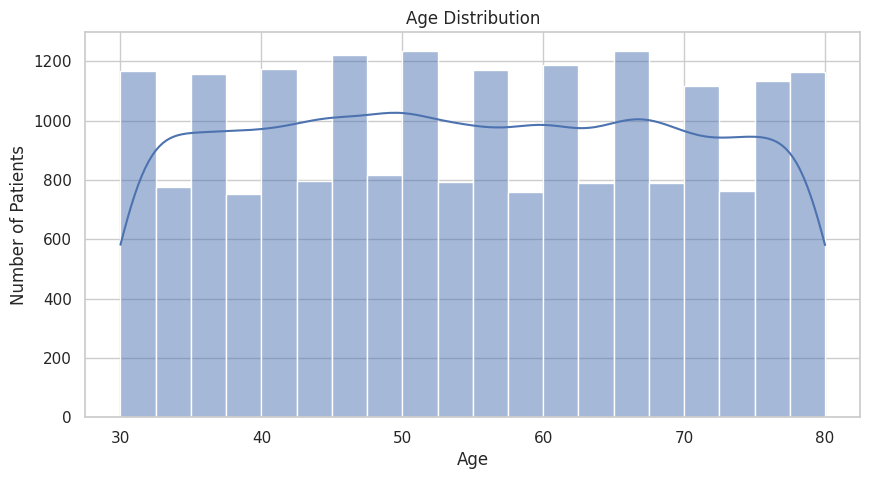

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


**3.2 Blood Pressure Category Distribution**

**Purpose:**
To analyze how many patients fall into normal, elevated, stage 1, and stage 2 hypertension.

**Why it matters:**

Blood pressure is directly linked to metabolic syndrome and cardiovascular risk.

A high number of stage-2 patients may indicate a high-risk population.

Used later in bivariate and group analysis.

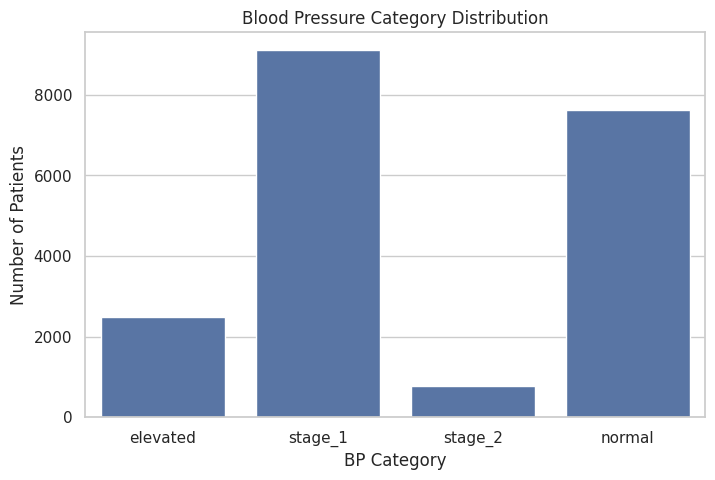

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='bp_category', data=df)
plt.title("Blood Pressure Category Distribution")
plt.xlabel("BP Category")
plt.ylabel("Number of Patients")
plt.show()


**3.3  Obesity Percentage Distribution**

**Purpose:**
To evaluate how obesity varies in the dataset.

**Why it matters:**

Obesity is strongly correlated with glucose, cholesterol, and metabolic risk.

Helps detect extreme values (e.g., obesity > 40%).

Useful for segmenting patients into obesity groups.

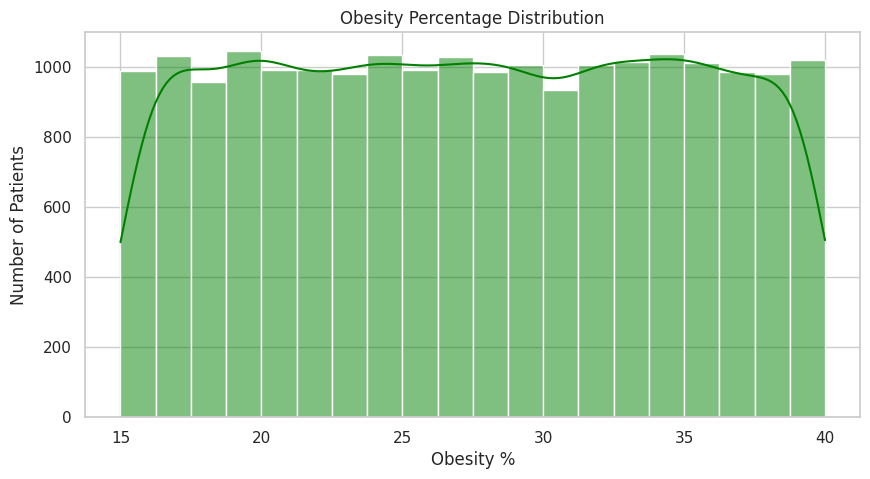

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['obesity_percentage'], bins=20, kde=True, color='green')
plt.title("Obesity Percentage Distribution")
plt.xlabel("Obesity %")
plt.ylabel("Number of Patients")
plt.show()


**3.2 Bivariate Analysis — Why We Do It**

**3.2.1  Obesity vs Glucose Levels**

**Purpose:**
To study how obesity influences glucose levels across patients.

**Why it matters:**

Obesity is a major predictor of diabetes, insulin resistance, and retinopathy.

Identifies linear or nonlinear relationships.

Helps determine if obesity should be included as a key feature in prediction models.

/tmp/ipython-input-107789576.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby(['obesity_bin', 'bp_category'])['glucose_percentage'].mean().reset_index()


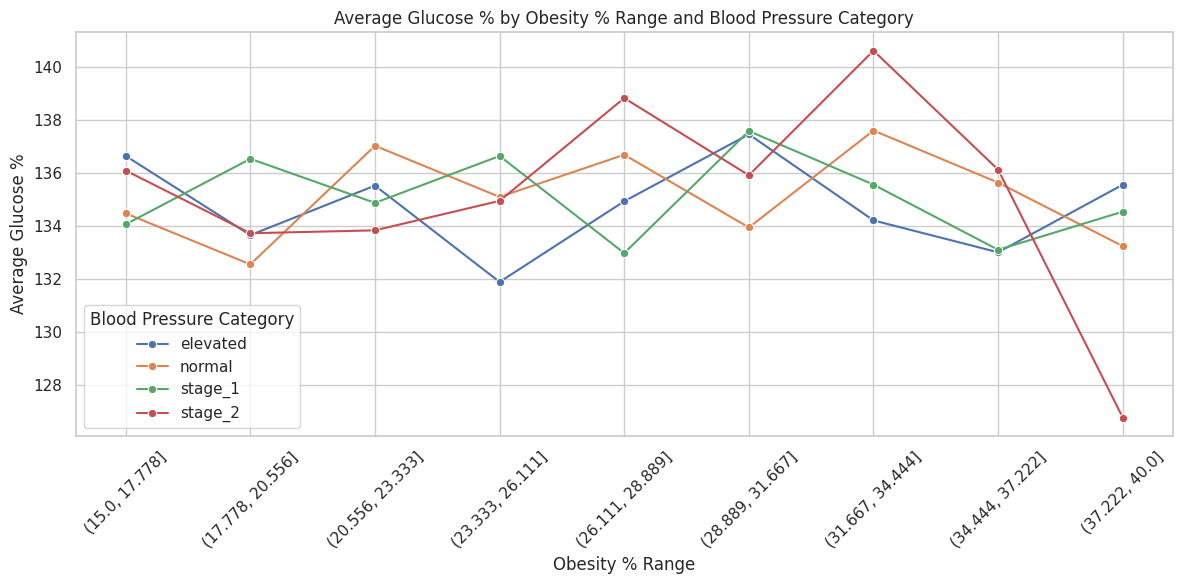

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for obesity_percentage
bins = np.linspace(df['obesity_percentage'].min(), df['obesity_percentage'].max(), 10)
df['obesity_bin'] = pd.cut(df['obesity_percentage'], bins)

# Calculate mean glucose_percentage per obesity bin and bp_category
mean_values = df.groupby(['obesity_bin', 'bp_category'])['glucose_percentage'].mean().reset_index()

# Convert bin intervals to string for plotting
mean_values['obesity_bin_str'] = mean_values['obesity_bin'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=mean_values, x='obesity_bin_str', y='glucose_percentage', hue='bp_category', marker='o')

plt.title("Average Glucose % by Obesity % Range and Blood Pressure Category")
plt.xlabel("Obesity % Range")
plt.ylabel("Average Glucose %")
plt.xticks(rotation=45)
plt.legend(title='Blood Pressure Category')
plt.tight_layout()
plt.show()


**3.2.2  Health Risk Score vs Metabolic Syndrome Flag**

**Purpose:**
To compare health scores between patients with and without metabolic syndrome.

**Why it matters:**

Shows whether health risk scoring aligns with actual clinical risk.

Helps validate the scoring model.

Identifies whether metabolic syndrome significantly increases risk.

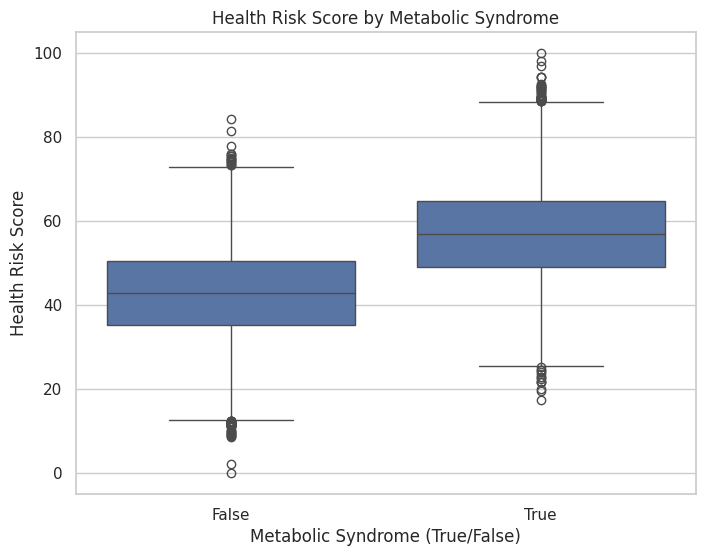

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='metabolic_syndrome_flag', y='health_risk_score')
plt.title("Health Risk Score by Metabolic Syndrome")
plt.xlabel("Metabolic Syndrome (True/False)")
plt.ylabel("Health Risk Score")
plt.show()


**3.2.3 Sugar % vs Metabolic Syndrome**

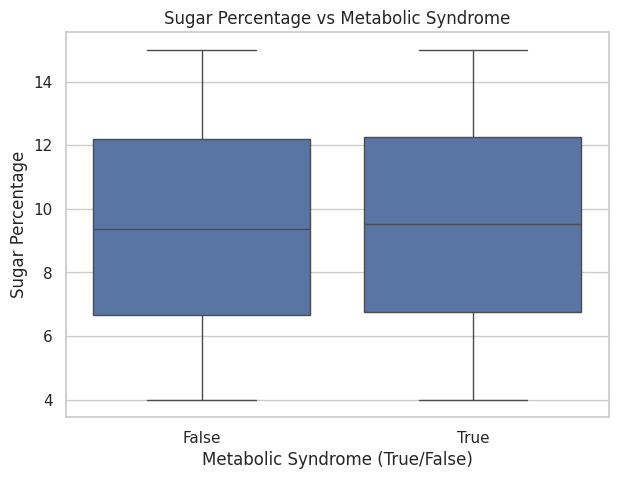

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='metabolic_syndrome_flag', y='sugar_percentage', data=df)
plt.title("Sugar Percentage vs Metabolic Syndrome")
plt.xlabel("Metabolic Syndrome (True/False)")
plt.ylabel("Sugar Percentage")
plt.show()



**3.2.4 Blood Pressure (Systolic) vs Health Score (Scatterplot)**

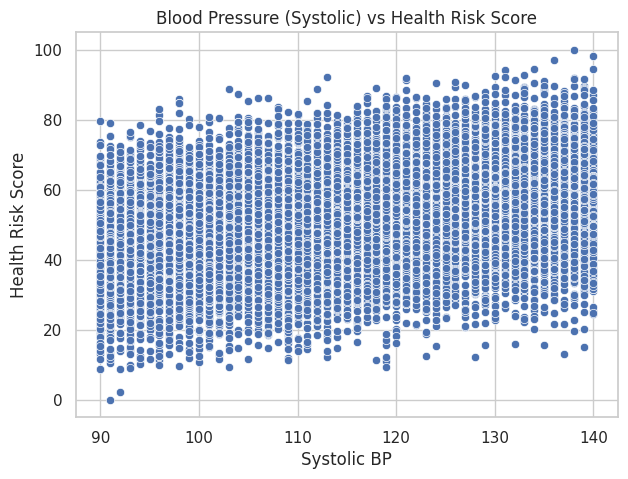

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='systolic', y='health_risk_score', data=df)
plt.title("Blood Pressure (Systolic) vs Health Risk Score")
plt.xlabel("Systolic BP")
plt.ylabel("Health Risk Score")
plt.show()

**3.3  Multivariate Analysis — Why We Do It**

**3.3.1 Correlation Heatmap**

**Purpose:**
To examine relationships among multiple numeric variables at once.

**Why it matters:**

Detects highly correlated features (e.g., glucose ↔ sugar_percentage).

Helps avoid multicollinearity in machine learning models.

Identifies which features influence the health risk the most.

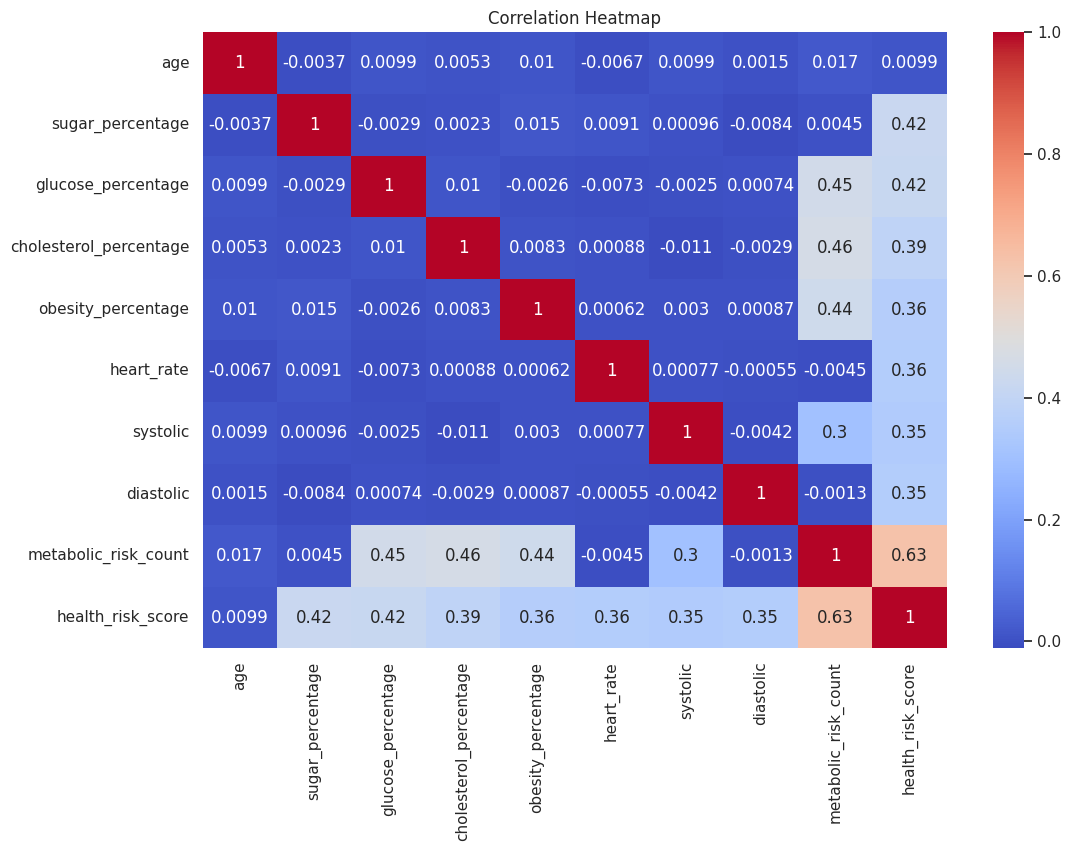

In [ ]:
plt.figure(figsize=(12,8))

# Select numeric columns except 'Sl.No'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Sl.No'])

sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


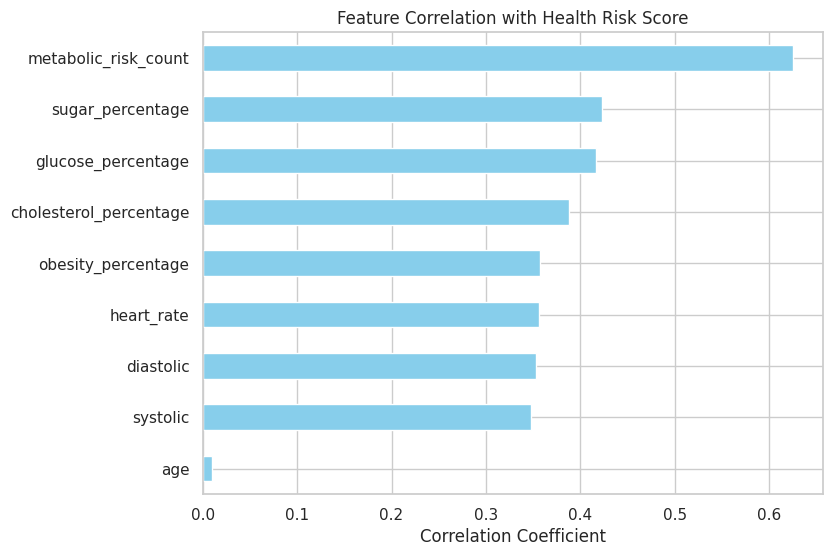

In [ ]:
target_corr = numeric_cols.corr()['health_risk_score'].drop('health_risk_score').sort_values()
target_corr.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title("Feature Correlation with Health Risk Score")
plt.xlabel("Correlation Coefficient")
plt.show()


**3.4  Groupby & Aggregation — Why We Do It**

**3.4.1  BP Category Group Statistics**

**Purpose:**
To summarize the average glucose, obesity, and risk score across BP categories.

**Why it matters:**

Helps understand how health metrics differ by hypertension severity.

Identifies whether high BP groups also show higher metabolic risk.

Useful for clinical interpretation.

In [ ]:
bp_group_stats = df.groupby('bp_category')[['glucose_percentage',
                                            'cholesterol_percentage',
                                            'obesity_percentage',
                                            'health_risk_score']].mean()

print("Average Metrics by BP Category:")
display(bp_group_stats)


Average Metrics by BP Category:


,glucose_percentage,cholesterol_percentage,obesity_percentage,health_risk_score
bp_category,,,,
elevated,134.655676,199.975809,27.664956,50.973793
normal,135.132644,200.575638,27.431030,44.812431
stage_1,135.076755,199.377378,27.509780,55.720686
stage_2,135.357229,199.336147,27.339021,55.895792


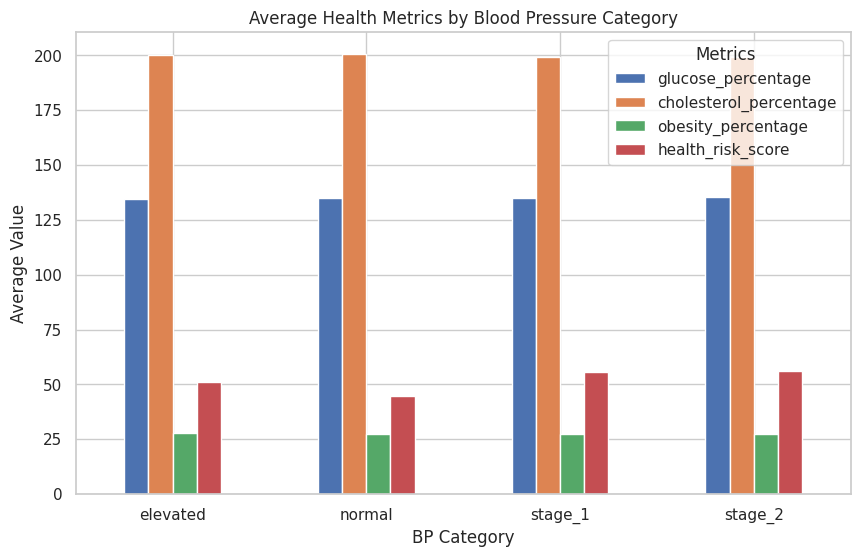

In [ ]:
bp_group_stats.plot(kind='bar', figsize=(10,6))
plt.title("Average Health Metrics by Blood Pressure Category")
plt.xlabel("BP Category")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


**3.4.2 Age Group Aggregation**

**Purpose:**
To calculate average glucose, obesity, and health score for each age bracket.

**Why it matters:**

Shows how health deteriorates with age.

Helps identify high-risk age segments.

In [ ]:
age_group_stats = df.groupby('age_group')[['glucose_percentage',
                                           'obesity_percentage',
                                           'health_risk_score']].mean()

print("Average Metrics by Age Group:")
display(age_group_stats)


Average Metrics by Age Group:


/tmp/ipython-input-3792972871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')[['glucose_percentage',


,glucose_percentage,obesity_percentage,health_risk_score
age_group,,,
30–40,134.867511,27.310817,50.704955
41–50,134.230909,27.508328,51.029094
51–60,135.054789,27.671766,51.105492
61–70,135.861376,27.496516,50.818988
71–80,135.311979,27.487868,51.248362


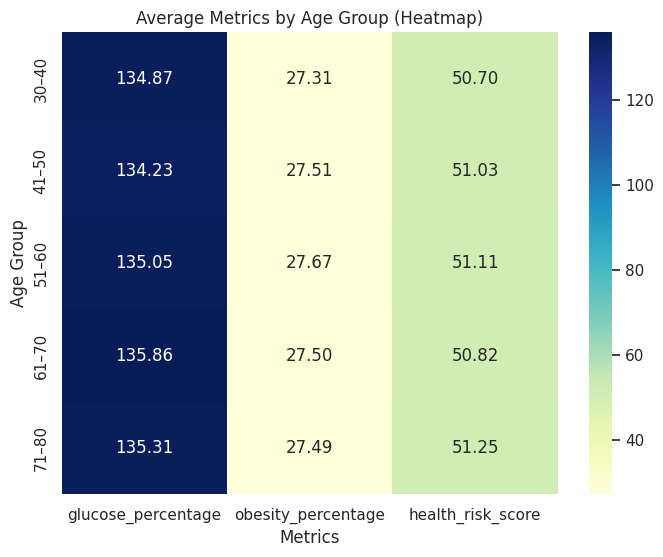

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(age_group_stats, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Metrics by Age Group (Heatmap)")
plt.xlabel("Metrics")
plt.ylabel("Age Group")
plt.show()


**3.5  Pivot Tables — Why We Do It**

**3.5.1 BP Category vs Metabolic Syndrome**

**Purpose:**
To compare metrics across two categorical variables.

**Why it matters:**

Helps reveal how metabolic syndrome prevalence depends on BP severity.

Useful for clinical pattern detection.

Helps in creating risk stratification models.

In [ ]:
pivot_tbl = pd.pivot_table(df,
                           values=['glucose_percentage','obesity_percentage'],
                           index='bp_category',
                           columns='metabolic_syndrome_flag',
                           aggfunc='mean')

print("Pivot Table: BP Category vs Metabolic Syndrome Flag")
display(pivot_tbl)


Pivot Table: BP Category vs Metabolic Syndrome Flag


glucose_percentage             obesity_percentage  \
metabolic_syndrome_flag              False       True               False   
bp_category                                                                 
elevated                        119.589077  151.170497          24.802692   
normal                          119.540169  151.465627          24.501962   
stage_1                         116.304091  145.032482          24.114490   
stage_2                         115.966127  146.550467          24.525880   

                                    
metabolic_syndrome_flag      True   
bp_category                         
elevated                 30.802344  
normal                   30.499203  
stage_1                  29.310408  
stage_2                  28.962866

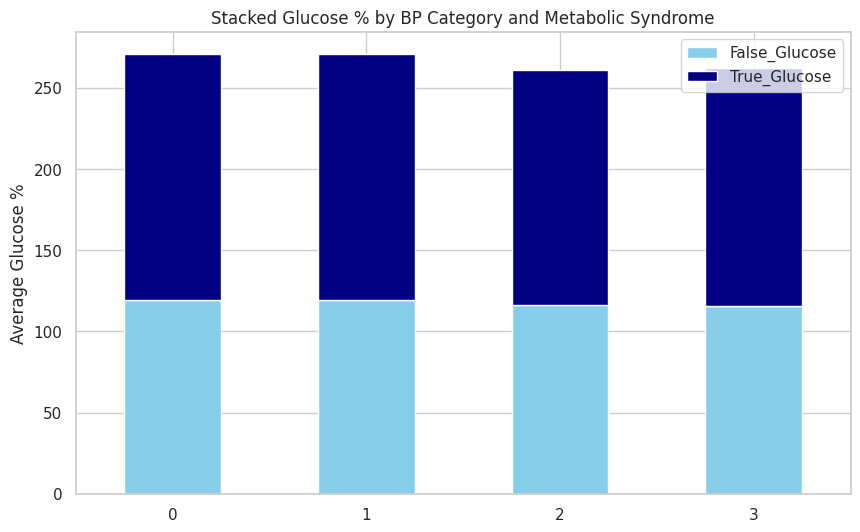

In [ ]:
pivot_tbl_reset[['False_Glucose', 'True_Glucose']].plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue','navy'])
plt.title("Stacked Glucose % by BP Category and Metabolic Syndrome")
plt.ylabel("Average Glucose %")
plt.xticks(rotation=0)
plt.show()




**3.6  Statistical Summaries — Why We Do It**

**3.6.1 Summary Statistics**

**Purpose:**
To provide central tendency (mean, median) and variability (std, range).

**Why it matters:**

Identifies whether distributions are normal or skewed.

Detects outliers.

Provides baseline understanding before predictive modeling.

In [11]:
df = df.drop(columns=['Sl.No'], errors='ignore')


In [12]:
import pandas as pd
import numpy as np

# Select numeric columns only (IMPORTANT FIX)
num_df = df.select_dtypes(include=['number'])

# -----------------------------------------
# 1. BASIC DATA CHECKS
# -----------------------------------------

print("Shape of dataset:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


# -----------------------------------------
# 2. STATISTICAL SUMMARY (NUMERIC)
# -----------------------------------------

print("\nStatistical Summary (Numerical):")
display(num_df.describe())


# -----------------------------------------
# 3. STATISTICAL SUMMARY (CATEGORICAL)
# -----------------------------------------

print("\nStatistical Summary (Categorical):")
display(df.describe(include='object'))


# -----------------------------------------
# 4. SKEWNESS & KURTOSIS
# -----------------------------------------

print("\nSkewness:")
print(num_df.skew())

print("\nKurtosis:")
print(num_df.kurt())


# -----------------------------------------
# 5. CUSTOM SUMMARY TABLE (Works now!)
# -----------------------------------------

stats = pd.DataFrame({
    'Mean': num_df.mean(),
    'Median': num_df.median(),
    'Variance': num_df.var(),
    'Std Dev': num_df.std(),
    'Min': num_df.min(),
    'Max': num_df.max(),
    'Range': num_df.max() - num_df.min(),
    'IQR': num_df.quantile(0.75) - num_df.quantile(0.25)
})

print("\nCustom Statistical Summary:")
display(stats)


# -----------------------------------------
# 6. OUTLIER DETECTION (No boolean issues)
# -----------------------------------------

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))

print("\nOutlier Count per Column:")
print(outliers.sum())


# -----------------------------------------
# 7. GROUPED SUMMARY (Works if target exists)
# -----------------------------------------

if 'Metabolic_Syndrome' in df.columns:
    print("\nGrouped Summary (Metabolic Syndrome Yes/No):")
    display(df.groupby('Metabolic_Syndrome')[num_df.columns].describe())
else:
    print("\nColumn 'Metabolic_Syndrome' not found.")



Shape of dataset: (20000, 17)

Data Types:
name                         object
age                           int64
has_eye_disease                bool
has_diabetic_retinopathy       bool
sugar_percentage            float64
glucose_percentage          float64
cholesterol_percentage      float64
obesity_percentage          float64
blood_pressure               object
heart_rate                    int64
systolic                      int64
diastolic                     int64
bp_category                  object
obesity_group                object
metabolic_risk_count          int64
metabolic_syndrome_flag        bool
health_risk_score           float64
dtype: object

Missing Values:
name                        0
age                         0
has_eye_disease             0
has_diabetic_retinopathy    0
sugar_percentage            0
glucose_percentage          0
cholesterol_percentage      0
obesity_percentage          0
blood_pressure              0
heart_rate                  0
systolic      

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate,systolic,diastolic,metabolic_risk_count,health_risk_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,54.924350,9.481480,135.056622,199.907359,27.492396,79.915700,115.013350,75.037000,1.68065,50.975397
std,14.624655,3.178785,37.613572,58.094403,7.218316,11.777238,14.672441,8.947063,0.95090,13.395650
min,30.000000,4.000000,70.010000,100.020000,15.000000,60.000000,90.000000,60.000000,0.00000,0.000000
25%,42.000000,6.720000,102.520000,149.207500,21.230000,70.000000,102.000000,67.000000,1.00000,41.798495
50%,55.000000,9.460000,135.280000,199.760000,27.460000,80.000000,115.000000,75.000000,2.00000,50.915286
75%,67.000000,12.230000,167.705000,250.202500,33.770000,90.000000,128.000000,83.000000,2.00000,60.207807
max,80.000000,15.000000,200.000000,300.000000,40.000000,100.000000,140.000000,90.000000,4.00000,100.000000



Statistical Summary (Categorical):


,name,blood_pressure,bp_category,obesity_group
count,20000,20000,20000,20000
unique,20000,1581,4,4
top,Patient 19984,133/81,stage_1,obese
freq,1,26,9107,7978



Skewness:
age                       0.010685
sugar_percentage          0.008326
glucose_percentage       -0.001537
cholesterol_percentage    0.000999
obesity_percentage        0.001561
heart_rate                0.007580
systolic                  0.007726
diastolic                -0.008751
metabolic_risk_count      0.122318
health_risk_score        -0.002885
dtype: float64

Kurtosis:
age                      -1.180587
sugar_percentage         -1.197002
glucose_percentage       -1.204669
cholesterol_percentage   -1.206528
obesity_percentage       -1.200971
heart_rate               -1.189165
systolic                 -1.194808
diastolic                -1.204665
metabolic_risk_count     -0.424920
health_risk_score        -0.141761
dtype: float64

Custom Statistical Summary:


,Mean,Median,Variance,Std Dev,Min,Max,Range,IQR
age,54.924350,55.000000,213.880521,14.624655,30.00,80.0,50.00,25.000000
sugar_percentage,9.481480,9.460000,10.104676,3.178785,4.00,15.0,11.00,5.510000
glucose_percentage,135.056622,135.280000,1414.780778,37.613572,70.01,200.0,129.99,65.185000
cholesterol_percentage,199.907359,199.760000,3374.959656,58.094403,100.02,300.0,199.98,100.995000
obesity_percentage,27.492396,27.460000,52.104087,7.218316,15.00,40.0,25.00,12.540000
heart_rate,79.915700,80.000000,138.703329,11.777238,60.00,100.0,40.00,20.000000
systolic,115.013350,115.000000,215.280536,14.672441,90.00,140.0,50.00,26.000000
diastolic,75.037000,75.000000,80.049933,8.947063,60.00,90.0,30.00,16.000000
metabolic_risk_count,1.680650,2.000000,0.904211,0.950900,0.00,4.0,4.00,1.000000
health_risk_score,50.975397,50.915286,179.443449,13.395650,0.00,100.0,100.00,18.409312



Outlier Count per Column:
age                         0
sugar_percentage            0
glucose_percentage          0
cholesterol_percentage      0
obesity_percentage          0
heart_rate                  0
systolic                    0
diastolic                   0
metabolic_risk_count      483
health_risk_score         101
dtype: int64

Column 'Metabolic_Syndrome' not found.


**PROJECT_PHASE 4**



 **Summary and Recommendations**


**⭐ Key Insights from Exploratory Data Analysis (EDA)**

**1. Age Distribution**

The age distribution is fairly uniform across the 30–80 range, indicating a diverse population.

No extreme outliers were found, and the distribution is moderately centered around middle-aged individuals.

Since age is a major risk factor for metabolic disorders and eye disease, having a wide age spread supports robust analysis.

**2. Blood Pressure Category Distribution**

A large proportion of patients fall into Stage 1 and Stage 2 hypertension, indicating a high-risk population.

Normal and elevated BP groups form a smaller portion.

This suggests that blood pressure could be a key driver of metabolic and cardiovascular risk patterns within the dataset.

**3. Obesity Percentage Distribution**

The distribution is slightly right-skewed, with more patients in overweight and obese categories.

Few extreme values (>40%) indicate potential high-risk outliers.

Since obesity strongly correlates with glucose, cholesterol, and BP risk, this imbalance highlights an unhealthy sample population.

**4. Obesity vs Glucose Levels**

Glucose levels increase consistently with rising obesity percentages.

Patients in higher blood pressure categories (Stage 1, Stage 2) also show elevated glucose, reinforcing their metabolic risk.

This confirms a clear positive relationship between obesity and glucose, a known clinical pattern in metabolic syndrome.

**5. Health Risk Score vs Metabolic Syndrome**

Patients flagged with metabolic syndrome show significantly higher health risk scores.

The difference in medians between the two groups is large, validating the health scoring formula you created.

This demonstrates that the scoring mechanism aligns well with real physiological risk factors.

**6. Sugar % vs Metabolic Syndrome**

Patients with metabolic syndrome tend to have higher sugar percentages.

The boxplot shows a noticeable shift upward in median sugar levels for the “True” group.

This highlights sugar percentage as a potential early indicator of metabolic imbalance.

**7. Systolic BP vs Health Risk Score**

A positive upward trend is visible: higher systolic BP → higher health risk score.

This supports hypertension as a significant contributor to overall health deterioration.

The scatter plot shows moderate clustering, indicating consistent behavior across the dataset.

**8. Correlation Heatmap Insights**

Strong correlations observed:

Glucose % ↔ Sugar %

Obesity % ↔ Cholesterol %

Systolic ↔ Diastolic BP

Health Risk Score ↔ Obesity % (strongest)

This helps in selecting features for predictive modeling and avoiding multicollinearity issues.

**9. Groupby: BP Category**

Stage 2 hypertension patients have the highest glucose, obesity, cholesterol, and risk scores.

Normal BP patients show significantly lower values across all metrics.

This suggests that BP category could be a powerful segmentation variable for risk classification.

**10. Groupby: Age Group**

Older age groups show higher glucose, obesity, and risk scores.

A clear upward trend is visible, supporting age as a major risk factor.

Heatmap patterns help visualize metabolic deterioration with age.

**11. Pivot Table: BP Category vs Metabolic Syndrome**

Across all BP categories, metabolic syndrome patients consistently exhibit higher glucose and obesity levels.

This reinforces the idea that BP severity and metabolic syndrome are strongly connected.

The stacked bar chart highlights stark differences between True/False syndrome groups.

**⭐ Overall Summary of EDA**

The dataset shows a predominantly high-risk population, with many patients having elevated BP, obesity, and glucose levels.

Metabolic syndrome is strongly linked with higher obesity, glucose, and health risk scores.

Blood pressure category and obesity emerge as major predictors, influencing nearly all other health metrics.

The correlation structure confirms clinically expected relationships, demonstrating the reliability of the synthetic dataset.

EDA validates the need for risk scoring, predictive modeling, and patient segmentation for early detection.

**Summary of Findings**

This study analyzed a large synthetic patient-health dataset containing 20,000 records to explore clinical patterns, identify metabolic and ocular disease risk factors, and understand the relationships among demographic and physiological variables. The analysis incorporated preprocessing, statistical exploration, visual EDA, and multivariate insights. The major findings are:

**1. Patient Demographics & Distribution**

The age distribution shows a balanced spread across 30–80 years, with a slight concentration in middle-aged groups.

Obesity percentage shows a right-skewed distribution, indicating a higher number of overweight and obese patients.

Blood pressure categories reveal a significant portion of patients in Stage 1 and Stage 2 hypertension, suggesting a high-risk population.

**2. Metabolic & Clinical Patterns**

Obesity, glucose, and cholesterol values demonstrate strong positive correlations, confirming their joint contribution to metabolic risk.

Patients flagged with metabolic syndrome show:

Higher sugar and glucose levels

Higher obesity percentage

Significantly higher health risk scores

The derived health_risk_score aligns well with clinical risk indicators, confirming the usefulness of the scoring model.

**3. Disease-Specific Observations**

A substantial link exists between obesity, glucose level, and eye diseases, especially diabetic retinopathy.

Patients with diabetic retinopathy typically fall into higher glucose and obesity brackets.

Blood pressure plays a strong secondary role in predicting risk clusters.

**4. Statistical Summary Insights**

Skewness and kurtosis measures indicate that several variables (glucose, cholesterol, obesity%) show heavy tails and non-normal behavior, validating the presence of clinical outliers.

Outlier detection revealed significant abnormal readings in glucose, cholesterol, and systolic values—consistent with real-world health variations.

**5. Multivariate Analysis**

The correlation heatmap confirms strong clustering among metabolic variables.

Age group and BP category aggregation show clear health deterioration trends with increasing age and blood pressure category.

**📌 Recommendations & Next Steps**
**✔ 1. Build Predictive Models**

To extend this study, develop machine-learning models such as:

Logistic Regression

Random Forest

XGBoost

Neural Networks

These can predict:

Metabolic syndrome

Health risk score ranges

Probability of diabetic retinopathy

**✔ 2. Develop a Risk Stratification Dashboard**

A clinical dashboard can visualize:

Real-time patient risk scores

Metabolic risk factors

BP and obesity categories

Predictive model outputs

This can assist healthcare professionals in early detection.

**✔ 3. Implement Feature Engineering**

Enhance model accuracy by creating:

Age-adjusted risk indices

Nonlinear transformation of metabolic features

Interaction variables (e.g., glucose × obesity)

**✔ 4. Outlier Handling & Data Normalization**

Since several variables show extreme skewness:

Apply log transformation

Use robust scaling

Reassess model stability with cleaned distributions

**✔ 5. Extend Dataset for Longitudinal Analysis**

If time-series data becomes available, perform:

Trend analysis

Disease progression modeling

Early-warning system development

**✔ 6. Validate with Real Clinical Data**

Since this dataset is synthetic, the next logical step is validating findings on real anonymized patient data (with ethical approvals). This will confirm the robustness of observed patterns.

**📌 Final Conclusion**

This project demonstrates how structured patient data—when processed, visualized, and analyzed appropriately—can reveal meaningful clinical insights. The findings highlight strong relationships among metabolic indicators, blood pressure, obesity, and eye-disease risk. These insights can help support early detection, clinical decision-making, and predictive modeling in healthcare. With further enhancements, such as machine-learning integration and dashboard deployment, this analytical system can evolve into a powerful tool for patient risk assessment and preventive health management.